## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how = 'outer')
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the DataFrame.
Count = merge_df['Mouse ID'].count()
Count

1893

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = merge_df.drop([909, 911, 913, 915, 917])
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame.
Count = merge_df['Mouse ID'].count()
Count

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_Regimen = pd.Series(merge_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'])
Median_Regimen = pd.Series(merge_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'])
Variance_Regimen = pd.Series(merge_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'])
Std_Regimen = pd.Series(merge_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'])
SEM_Regimen = pd.Series(merge_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Table = pd.DataFrame({'Mean': Mean_Regimen, 'Median': Median_Regimen, 'Variance': Variance_Regimen,
                             'Standard Deviation': Std_Regimen, 'Standard Error':SEM_Regimen})
#Summary_Table
Summary_Table

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

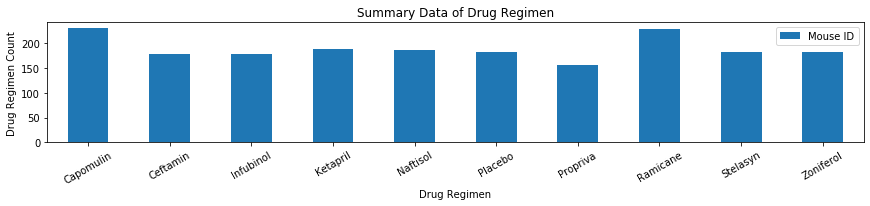

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Count_Table =pd.DataFrame(merge_df.groupby(merge_df['Drug Regimen']).count()['Mouse ID'])
Count_Table
Count_Table.plot(kind='bar', figsize=(12, 3))
plt.tight_layout()
plt.title('Summary Data of Drug Regimen')
plt.ylabel("Drug Regimen Count")
plt.xticks(rotation = 30)

Text(0, 0.5, 'Count')

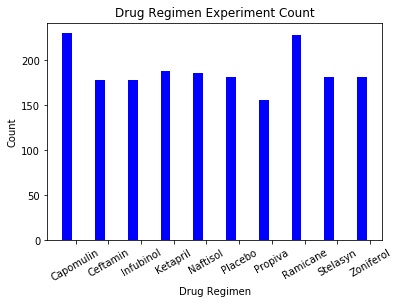

In [35]:
Drug = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril','Naftisol',
       'Placebo','Propiva','Ramicane','Stelasyn','Zoniferol']
Drug_Length = np.arange(10)
Width = 0.3
Count_Table =pd.DataFrame(merge_df.groupby(merge_df['Drug Regimen']).count())
plt.bar(Drug_Length, Count_Table['Mouse ID'], color='b', Width = Width, align = 'center', label = 'Drug Regimen')
plt.xticks(Drug_Length, Drug)
plt.xticks(rotation = 30)
plt.title('Drug Regimen Experiment Count')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

## Pie Plots

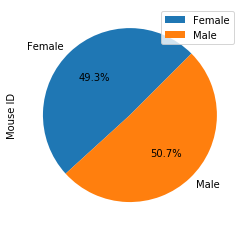

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Count = pd.DataFrame(merge_df.groupby(['Sex']).count()['Mouse ID'])
Gender_Pie_Plot = Gender_Count.plot(kind='pie', autopct = '%1.1f%%', subplots='True', legend=True, startangle=45)

(-1.1062425414441641,
 1.103265408136953,
 -1.1053783437113598,
 1.100256111605303)

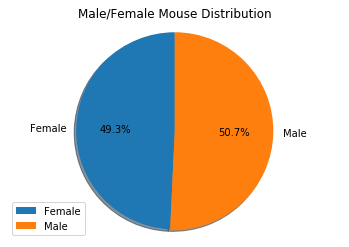

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_Count = pd.DataFrame(merge_df.groupby(['Sex']).count()['Mouse ID'])
Gender = ['Female', 'Male']
plt.title("Male/Female Mouse Distribution")
plt.pie(Gender_Count['Mouse ID'], labels = Gender, autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(loc='lower left')
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Merge_df = pd.DataFrame(merge_df.groupby(['Mouse ID']).nth(-1))
Drug_df = Merge_df.loc[(Merge_df['Drug Regimen'] == "Ketapril")|
                  (Merge_df['Drug Regimen'] == "Naftisol")|
                  (Merge_df['Drug Regimen'] == 'Stelasyn')|
                  (Merge_df['Drug Regimen'] == 'Propriva')| 
                  (Merge_df['Drug Regimen'] == 'Placebo')| 
                  (Merge_df['Drug Regimen'] == 'Zoniferol'), :]
Merge_df.drop(Drug_df.index, inplace=True)
Q1 = Merge_df['Tumor Volume (mm3)'].quantile(0.25)
Q3 = Merge_df['Tumor Volume (mm3)'].quantile(0.75)
IQR = round(Q3 - Q1, 2)
Merge_Filtered = Merge_df[(Merge_df['Tumor Volume (mm3)'] < Q3) & (Merge_df['Tumor Volume (mm3)'] > Q1)]
Merge_Filtered


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


{'whiskers': [<matplotlib.lines.Line2D at 0x1c8b43c7d48>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8b43cc888>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8b43c7548>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8b43cce88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c8b43d18c8>],
 'means': []}

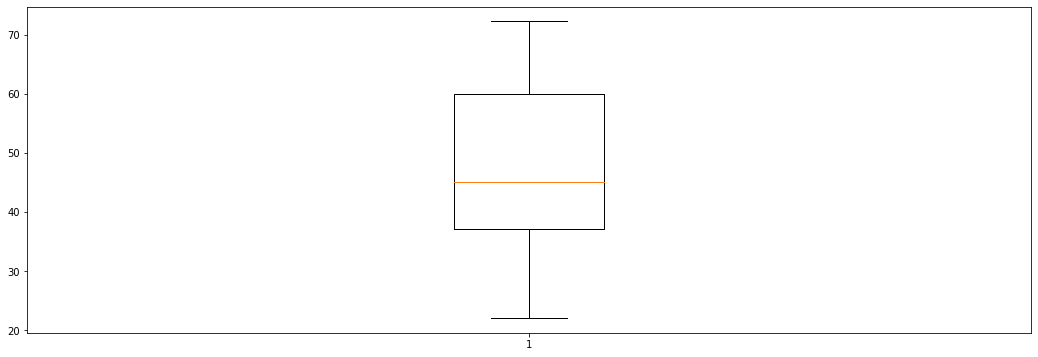

In [98]:
Infubinol = pd.DataFrame(Merge_df.loc[Merge_df['Drug Regimen'] == "Infubinol", :][['Drug Regimen','Tumor Volume (mm3)']])
Ramicane = pd.DataFrame(Merge_df.loc[Merge_df['Drug Regimen'] == "Ramicane", :][['Drug Regimen','Tumor Volume (mm3)']])
Capomulin = pd.DataFrame(Merge_df.loc[Merge_df['Drug Regimen'] == "Capomulin", :][['Drug Regimen','Tumor Volume (mm3)']])
Ceftamin = pd.DataFrame(Merge_df.loc[Merge_df['Drug Regimen'] == "Ceftamin", :][['Drug Regimen','Tumor Volume (mm3)']])
plt.figure(1, figsize = (18, 6))
plt.boxplot(Merge_df['Tumor Volume (mm3)'])

## Line and Scatter Plots

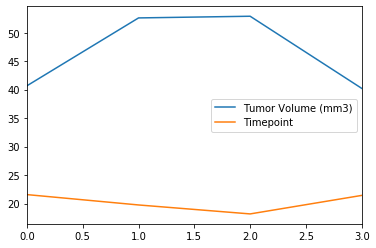

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Merge_df = pd.DataFrame(merge_df.groupby(['Drug Regimen']).mean()[['Tumor Volume (mm3)','Timepoint', 'Weight (g)']])
Merge_df.reset_index(inplace=True)
Merge_1_df = Merge_df.drop([3, 4, 5, 6, 8, 9])
Merge_1_df.reset_index(inplace=True)
Merge_1_df = Merge_1_df[['Tumor Volume (mm3)', 'Timepoint']]
Merge_1_df
Merge_1_df.plot.line()

Text(0.5, 0, 'Weight (g)')

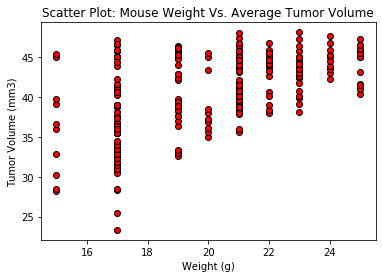

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_Scatter = merge_df.loc[merge_df['Drug Regimen'] == "Capomulin", :][['Drug Regimen','Tumor Volume (mm3)','Weight (g)']]
Capomulin_Scatter
plt.scatter(Capomulin_Scatter['Weight (g)'],Capomulin_Scatter['Tumor Volume (mm3)'], marker='o', facecolors = 'red', edgecolors = 'black')
plt.title("Scatter Plot: Mouse Weight Vs. Average Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

Text(0.5, 1.0, 'Weight Vs. Tumor Volume')

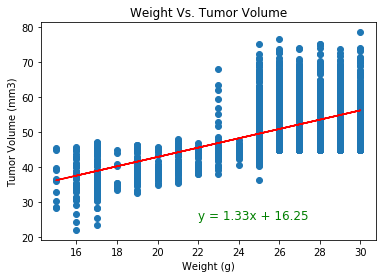

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_value = merge_df['Weight (g)']
y_value = merge_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(22,25),fontsize=12,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight Vs. Tumor Volume")

In [28]:
#Capomulin_Scatter.set_index('Drug Regimen')
#Calculate Correlation Coefficient 
Capomulin_Scatter.corr()


,Tumor Volume (mm3),Weight (g)
Tumor Volume (mm3),1.0000,0.5257
Weight (g),0.5257,1.0000
